## preprocessed data

In [1]:
import pandas as pd

In [18]:
content = pd.read_csv("train.csv")
content = content.dropna()
content

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [49]:
age = [a for a in content['Age']]
fare = [f for f in content['Fare']]
#len(age)
fare

63

In [82]:
data = dict(zip(content['Age'], content['Fare']))


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

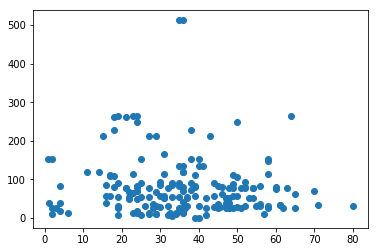

In [34]:
plt.scatter(age, fare)

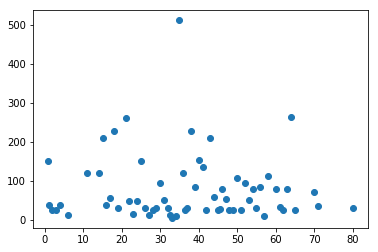

In [58]:
x, y = zip(*data.items())
plt.scatter(x, y)

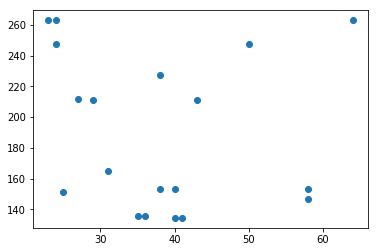

In [125]:
# preprocessed dirty data, easy way
age_with_fare = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)]
ages = age_with_fare['Age']


fares = age_with_fare['Fare']
#fares
plt.scatter(ages, fares)

## random choice

In [111]:
import numpy as np
import random
# help(random.random)
random.randint(-10, 10)
# help(np.mean)


inf

loop:1000, current loss 569.0175368421052
loop:999, current loss 383.49122105263154
loop:998, current loss 160.98465263157894
loop:993, current loss 160.8596421052632
loop:992, current loss 106.28333684210527
loop:988, current loss 85.44034736842107
loop:985, current loss 65.80876842105265
loop:946, current loss 61.26228421052633
loop:734, current loss 61.20965263157896


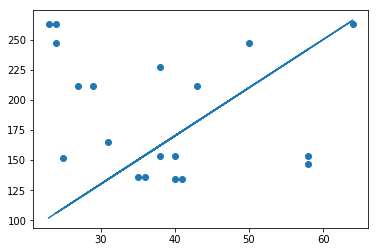

In [128]:

def loss(y, y_hat):
    return np.mean(abs(y - y_hat))

def estimate_func(age, k, b):
    return k * age + b


def random_choice(ages, fares):
    k_best = 0
    b_best = 0
    loop_time = 1000
    min_loss = float('inf')
    
    while loop_time:
        k = random.randint(-10, 10)
        b = random.randint(-10, 10)
        
        y_hat = estimate_func(ages, k, b)
        cur_loss = loss(fares, y_hat)
        
        if cur_loss < min_loss:
            k_best, b_best = k, b
            min_loss = cur_loss
            print("loop:{}, current loss {}".format(loop_time, cur_loss))
        
        loop_time -= 1
    
    return k_best, b_best

k_best, b_best = random_choice(ages, fares)
plt.scatter(ages, fares)
plt.plot(ages, [k_best * age  + b_best for age in ages])

## Supervised Direction

In [156]:
all_direction = [
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1]
]

def step():
    return random.random()

def supervised_direction(ages, fares):
    k_best = 0
    b_best = 0
    loop_time = 1000
    min_loss = float('inf')
    direction = all_direction[0]
    
    k = random.randint(-10, 10)
    b = random.randint(-10, 10)
    
    while loop_time:
        k_delta = direction[0] * step()
        b_delta = direction[1] * step()
        
        k += k_delta
        b += b_delta
        
        y_hat = estimate_func(ages, k, b)
        cur_loss = loss(fares, y_hat)
        
        if cur_loss < min_loss:
            k_best, b_best = k, b
            min_loss = cur_loss
            print("loop:{}, current loss {}".format(loop_time, cur_loss))
        else:
            direction = random.choice(list(d for d in all_direction if d != direction))
            
        loop_time -= 1
        
    return k_best, b_best

loop:1000, current loss 267.5022419730679
loop:998, current loss 252.19271072963895
loop:997, current loss 218.25048072583917
loop:996, current loss 191.44369706368906
loop:995, current loss 168.61046679144317
loop:994, current loss 158.94118406056427
loop:993, current loss 155.9873716580583
loop:992, current loss 127.58028292194835
loop:991, current loss 123.4903960176362
loop:990, current loss 88.48724317500381
loop:989, current loss 67.41900956739308
loop:988, current loss 64.36709991537755
loop:967, current loss 63.83201293332004
loop:965, current loss 62.169840891296765
loop:936, current loss 61.78989041028775
loop:912, current loss 61.66484694400735


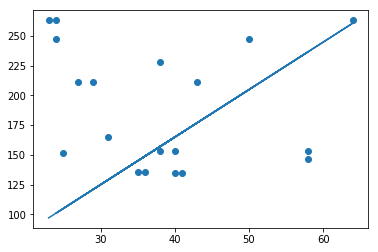

In [157]:
k_best, b_best = supervised_direction(ages, fares)
plt.scatter(ages, fares)
plt.plot(ages, [k_best * age  + b_best for age in ages])

## Gradient Descent

$$\frac{\partial loss}{\partial k}= -x  $$

$$\frac{\partial loss}{\partial b}= -1  $$

so direction = \[1, 1]

In [166]:
def gradient_descent(ages, fares):
    k_best = 0
    b_best = 0
    loop_time = 1000
    min_loss = float('inf')
    direction = [1, 1]
    rate = 1e-1
    
    k = random.randint(-10, 10)
    b = random.randint(-10, 10)
    
    while loop_time:
        k_delta = direction[0] * rate
        b_delta = direction[1] * rate
        
        k += k_delta
        b += b_delta
        
        y_hat = estimate_func(ages, k, b)
        cur_loss = loss(fares, y_hat)
        
        if (cur_loss > min_loss):
            break
        
        k_best, b_best = k, b
        min_loss = cur_loss
        print("loop:{}, current loss {}".format(loop_time, cur_loss))
         
        loop_time -= 1
        
    return k_best, b_best

loop:1000, current loss 106.84385263157897
loop:999, current loss 102.93332631578947
loop:998, current loss 99.0228
loop:997, current loss 95.1122736842105
loop:996, current loss 91.41008421052632
loop:995, current loss 88.2192947368421
loop:994, current loss 85.55087368421052
loop:993, current loss 82.88245263157894
loop:992, current loss 80.21403157894734
loop:991, current loss 77.54561052631578
loop:990, current loss 74.87718947368418
loop:989, current loss 72.30350526315787
loop:988, current loss 70.26666315789471
loop:987, current loss 68.47192631578945
loop:986, current loss 66.67718947368418
loop:985, current loss 64.88245263157891
loop:984, current loss 63.326315789473654
loop:983, current loss 62.50044210526314
loop:982, current loss 61.905705263157884
loop:981, current loss 61.683336842105255


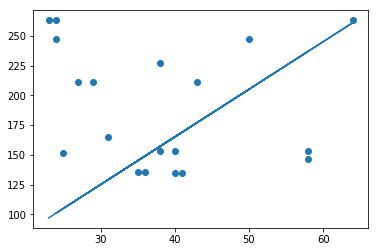

In [167]:
k_best, b_best = gradient_descent(ages, fares)
plt.scatter(ages, fares)
plt.plot(ages, [k_best * age  + b_best for age in ages])